## OpenCV
* Create a black image of 512X512 dimension and fill region 50X50 with
green color.
* Create a black image of 512X512 dimension.
a. Add a line from the point (10,1) to (500,100)
b. Draw a rectangle with corner points at (10,1) and (500,100

In [3]:
import cv2 as cv
import numpy as np

In [3]:
img = np.zeros((512,512,3),np.uint8)

img[:50,:50] = (0,255,0)
cv.imshow('im1',img)
cv.waitKey(0)

10

In [4]:
img2 = np.zeros((512,512,3),np.uint8)

cv.line(img2,(10,1),(500,100),(200,0,0),3)
cv.rectangle(img2,(10,1),(500,100),(0,0,200),2)
cv.imshow('im1',img2)
cv.waitKey(0)

-1

## Standardization and Normalization
### 1) Apply Standardization/ Normalization for the immunotherapy problem
(day2) and check whether the accuracy is improved.
### 2) Apply Standardization/ Normalization to the required columns in
banking.csv dataset and check whether any improvement in accuracy is
obtained.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Immunotherapy.csv')
data.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1


In [25]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

age = data['age']

[0.73913043478260865, 0.56521739130434778, 0.86956521739130432, 0.78260869565217395, 0.78260869565217395, 0.82608695652173914, 0.86956521739130432, 0.86956521739130432, 0.86956521739130432, 0.91304347826086951, 0.86956521739130432, 0.86956521739130432, 0.82608695652173914, 0.86956521739130432, 0.86956521739130432, 0.86956521739130432, 0.82608695652173914, 0.82608695652173914, 0.82608695652173914]


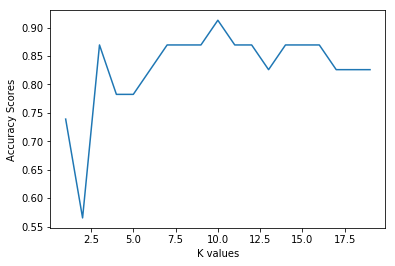

In [26]:
data = data.as_matrix()
#type(data) - numpy.ndarray
X = data[:,0:6]
X = preprocessing.scale(X)
X_train,X_test,y_train,y_test = train_test_split(X,data[:,7]) 

accu_scores = []

for i in range(1,20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    p = model.predict(X_test)
    accu_scores.append(accuracy_score(y_test,p))

print accu_scores   
plt.plot(range(1,20),accu_scores)
plt.xlabel("K values")
plt.ylabel("Accuracy Scores")
plt.show()


## GridsearchCV
### 1) Write a program to get the optimum value of k for a KNN problem using
GridSearchC